
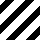
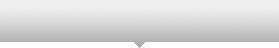
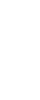
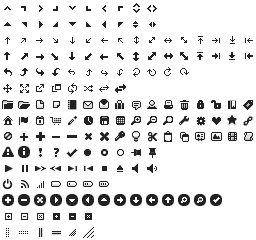
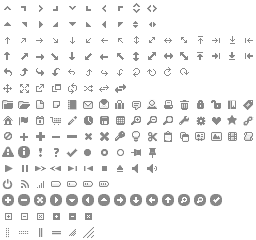
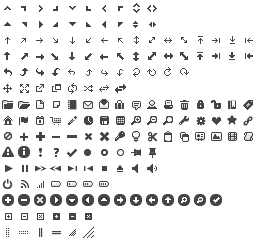
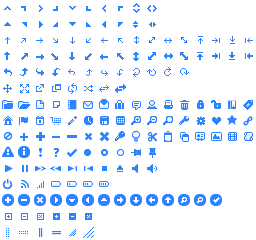
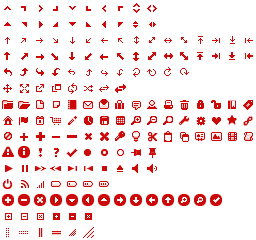
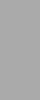
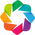
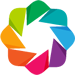
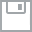
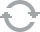
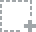
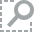
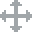
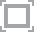
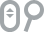

In [1]:
%matplotlib inline
# data manipulation and modeling
import numpy as np
import pandas as pd
import statsmodels.api as sm

# graphix
import matplotlib.pyplot as plt
import prettyplotlib as pplt
import seaborn as sns
import statsmodels.graphics.tsaplots as tsaplots

from bokeh.plotting import figure,gridplot,show,output_notebook
from bokeh.models import Range1d
output_notebook()

# utility
import os

# notebook parameters
pd.set_option('display.max_columns', 40) # number of columns in training set
plt.rcParams['figure.figsize'] = (25.0, 25.0)

In [2]:
training_data = pd.read_csv("TrainingSet.csv", index_col=0)
submission_labels = pd.read_csv("SubmissionRows.csv", index_col=0)

In [3]:
training_data.head(100)

,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],Country Name,Series Code,Series Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.769214e+00,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.027746e+00,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.244887e+00,Afghanistan,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.293310e+01,Afghanistan,allsi.gen_pop,(%) Generosity of All Social Insurance
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.899681e+01,Afghanistan,allsp.gen_pop,(%) Generosity of All Social Protection
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.242306e+01,Afghanistan,allsa.gen_pop,(%) Generosity of All Social Safety Nets
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.205600e-01,Afghanistan,allsi.cov_pop,(%) Program participation - All Social Insurance
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.496313e+01,Afghanistan,allsp.cov_pop,(%) Program participation - All Social Protection
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.451376e+01,Afghanistan,allsa.cov_pop,(%) Program participation - All Social Safety ...
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,Afghanistan,lm_ub.cov_pop,(%) Program participation - Unemp benefits and...


In [4]:
submission_labels.head()

,2008 [YR2008],2012 [YR2012]
559,NaN,NaN
618,NaN,NaN
753,NaN,NaN
1030,NaN,NaN
1896,NaN,NaN


Submission labels are simpler. First observation is we want to predict 2008 and 2012 (and not the years in between). Second observation is that the index values indentify specific rows in the training set. E.g., we want to predict the row in the training set that has the ID 559. Just to look that up:

In [5]:
training_data.loc[559]

1972 [YR1972]                                    NaN
1973 [YR1973]                                    NaN
1974 [YR1974]                                    NaN
1975 [YR1975]                                    NaN
1976 [YR1976]                                    NaN
1977 [YR1977]                                    NaN
1978 [YR1978]                                    NaN
1979 [YR1979]                                    NaN
1980 [YR1980]                                    NaN
1981 [YR1981]                                    NaN
1982 [YR1982]                                    NaN
1983 [YR1983]                                    NaN
1984 [YR1984]                                    NaN
1985 [YR1985]                                    NaN
1986 [YR1986]                                    NaN
1987 [YR1987]                                    NaN
1988 [YR1988]                                    NaN
1989 [YR1989]                                    NaN
1990 [YR1990]                                 

make it easier to grab any column that we want.

In [6]:
def generate_year_list(start, stop=None):
    """ 
    make a list of column names for specific years
    in the format they appear in the data frame start/stop inclusive
    """

    if isinstance(start, list):
        data_range = start
    elif stop:
        data_range = range(start, stop+1)
    else:
        data_range = [start]
    
    yrs = []
    
    for yr in data_range:
        yrs.append("{0} [YR{0}]".format(yr))
        
    return yrs

# ========== TEST CASES =======
# one year
print generate_year_list(2008)

# start and stop (inclusive)
print generate_year_list(1985, 1990)

# custom year list
print generate_year_list([1985, 1990])

['2008 [YR2008]']
['1985 [YR1985]', '1986 [YR1986]', '1987 [YR1987]', '1988 [YR1988]', '1989 [YR1989]', '1990 [YR1990]']
['1985 [YR1985]', '1990 [YR1990]']


In [7]:
prediction_rows = training_data.loc[submission_labels.index]

In [8]:
#prediction_rows

In [9]:
prediction_rows = prediction_rows[generate_year_list(1972, 2007)]
prediction_rows.head()

,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007]
559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0480,0.0490,0.0490,0.0490,0.0490,0.0840,0.1180,0.1520,0.1870,0.2210,0.256000,0.291000,0.325000,0.360000,0.395000,0.430000,0.4650
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000047,0.000046,0.000879,0.001058,0.012241,0.021071,0.0190
753,0.296,0.2909,0.2852,0.2798,0.2742,0.2683,0.2624,0.2565,0.2503,0.2439,0.2374,0.2304,0.2229,0.2151,0.2071,0.1993,0.1914,0.1836,0.1762,0.1693,0.1627,0.1571,0.1521,0.1479,0.1446,0.1417,0.1391,0.1366,0.1339,0.131000,0.127700,0.124400,0.121000,0.117700,0.114500,0.1115
1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.0010,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.0010
1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9640,0.9640,0.9650,0.9650,0.9650,0.9650,0.9650,0.964000,0.964000,0.963000,0.963000,0.962000,0.962000,0.9610


In [10]:
#prediction_rows.info()

In [11]:
# p1 = figure(title='Title',plot_width=800, plot_height=800)
# p1.line(generate_year_list(2000, 2007),training_data.loc[737],alpha=.4, line_width=4)
# show(p1)
#country, descrip = training_data[["Country Name", "Series Name"]].loc[r]

#p2 = figure(title="{} - {}".format(country, descrip),plot_width=500, plot_height=200,title_text_font_size='6pt')
p2 = figure(title="Try",plot_width=500, plot_height=200,title_text_font_size='6pt')
p2.line(generate_year_list(1972, 2007),training_data[100:101,:],alpha=.4, line_width=2)
#p2.scatter(generate_year_list(2000, 2007),training_data.loc[737], alpha=0.4,)
show(p2)

TypeError: unhashable type

In [12]:
np.random.seed(10)
rand_rows = np.random.choice(prediction_rows.index.values, size=10)

def plot_rows(data, ids=None):
#     bmap = pplt.brewer2mpl.get_map('Set3','Qualitative', 10)
#     colors = bmap.mpl_colors
    
    if not None == ids:
        get_rows = lambda: enumerate(ids)
    else:
        get_rows = lambda: enumerate(data.index.values)
    
    for i,r in get_rows():
        time_data = data.loc[r]

        just_years = [y[:4] for y in data.columns]
        X = pd.DatetimeIndex(just_years)
        country, descrip = training_data[["Country Name", "Series Name"]].loc[r]

        p = figure(title="{} - {}".format(country, descrip),plot_width=500, plot_height=200,title_text_font_size='6pt')
        p.line(X, time_data,alpha=.4, line_width=2)
        p.scatter(X, time_data, alpha=0.4,)
        show(p)
plot_rows(prediction_rows, ids=rand_rows)


P:\Anaconda Python\Anaconda\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


P:\Anaconda Python\Anaconda\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


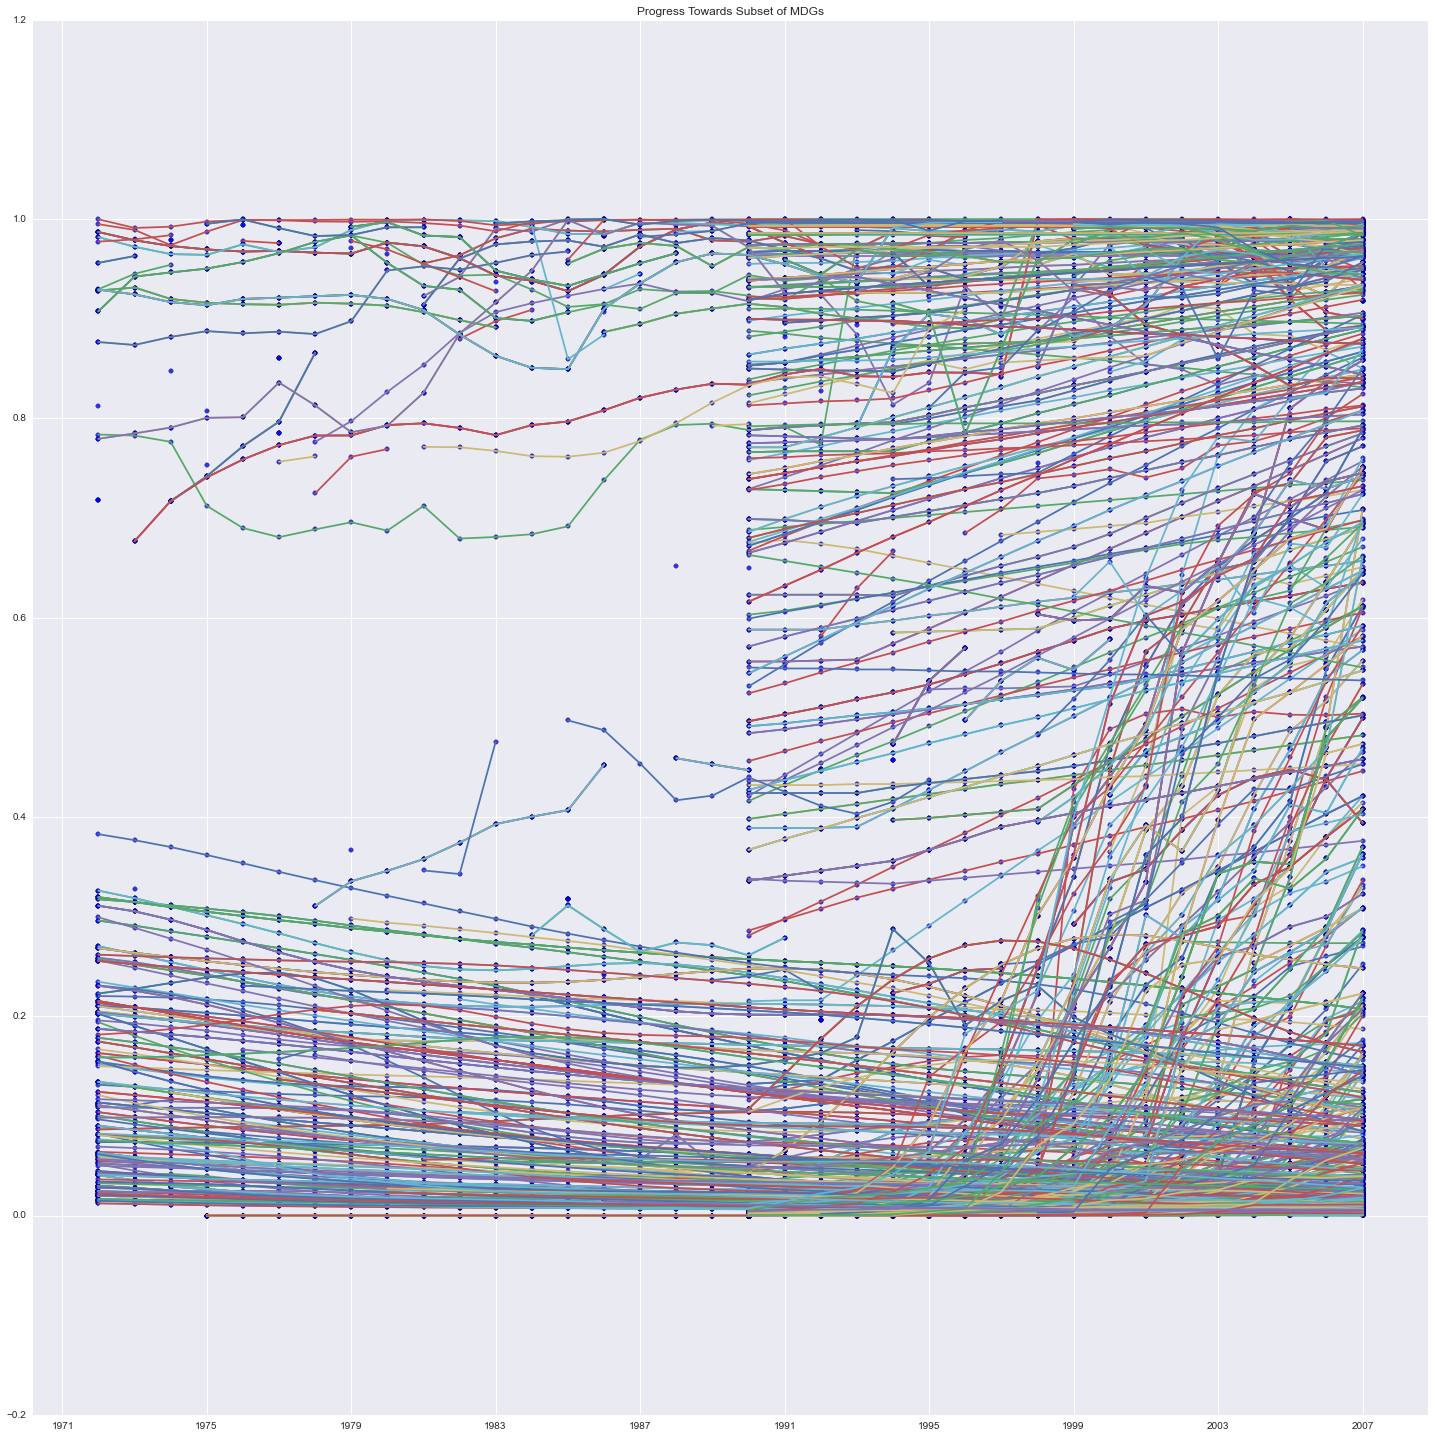

In [13]:
# grab a random sample of 10 of the timeseries
np.random.seed(100)
rand_rows = np.random.choice(prediction_rows.index.values, size=1000)

def plot_rows(data, ids=None, linestyle="-", legend=True):
    # get some colors for the lines
    bmap = pplt.brewer2mpl.get_map('Set3','Qualitative', 10, True)
    #colors = bmap.mpl_colors
    
    if not None == ids:
        get_rows = lambda: enumerate(ids)
    else:
        get_rows = lambda: enumerate(data.index.values)
    
    for i, r in get_rows():
        # get the time series values
        time_data = data.loc[r]

        # create an x axis to plot along
        just_years = [y[:4] for y in data.columns]
        X = pd.DatetimeIndex(just_years)

        # get time series info for labeling
        country, descrip = training_data[["Country Name", "Series Name"]].loc[r]

        # plot the series
        plt.plot(X, time_data, 
                 label="{} - {}".format(country, descrip), ls=linestyle)
        plt.scatter(X, time_data, alpha=0.8)

#     if legend:
#         plt.legend(loc=0)
    plt.title("Progress Towards Subset of MDGs")

plot_rows(prediction_rows, ids=rand_rows)
plt.show()